In [144]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [161]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as st
from sqlalchemy import desc

# Reflect Tables into SQLAlchemy ORM

In [146]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [147]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [148]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [149]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [150]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [151]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [152]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

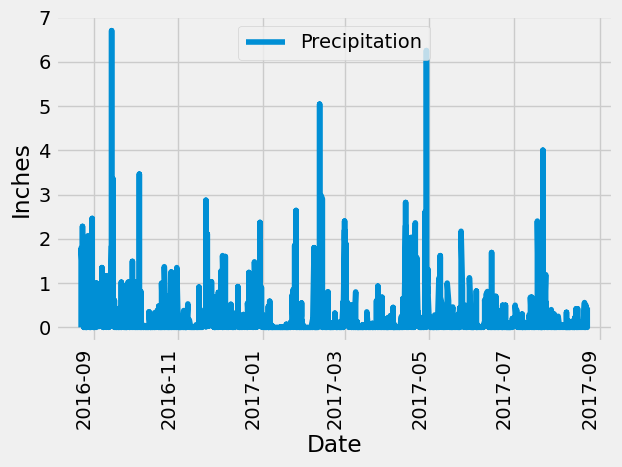

<Figure size 640x480 with 0 Axes>

In [153]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# So, now that we know that the last date is 08/23/2017 (based on SQL above), we want to assign that to
# a variable...
last_data = dt.datetime.strptime(session.query(measurement).\
                                 order_by(measurement.date.desc()).\
                                 first().date, "%Y-%m-%d")

# Calculate the date one year from the last date in data set.
year_ago = last_data - dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores

# ----------------------------------------------------------------------# 
# Looks like there are two potential issues here... The first issue
# is that the precipitation was across multiple stations. Are we just
# supposed to sum the data for any given date? Or use an average of the 
# different stations collecitng data? I'm not sure it's meaningful to just
# add up all the different data by date. For now, though, let's do that
# and assume that we are going to plot and assume that the date sorting will
# take care of the required grouping.
#
# The second issue is that, from examining the data set using a SQL browser,
# There are a few rows with NA values for precipitation, so we are going to 
# need to do some data quality work to clean those up before we try to plot
# them.
# ----------------------------------------------------------------------# 

full_year = session.query(measurement.id,
                          measurement.station,
                          measurement.date,
                          measurement.prcp,
                          measurement.tobs).\
                            filter(measurement.date > year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
columns = ['ID', 'Station', 'Date', 'Precipitation', 'Temperatures']
measurements_df = pd.DataFrame(data=full_year, columns=columns)
measurements_df.set_index('ID', drop=True, inplace=True)
measurements_df = measurements_df.dropna()

# Sort the dataframe by date
measurements_df = measurements_df.sort_values(by=['Date'], ascending=True)
measurements_df['Date'] = pd.to_datetime(measurements_df['Date'])

# Use Pandas Plotting with Matplotlib to plot the data
# First, we need to down-select to just the data we need, meaning the date and the
# precipitation numbers.
precip_df = measurements_df[['Date','Precipitation']]
precip_df.set_index('Date', drop=True, inplace=True)
# ax = precip_df.plot(kind='bar')
ax = precip_df.plot(x_compat=True)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel("Inches")
legend = ax.legend(loc='upper center')


plt.show()
plt.tight_layout()


In [154]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_df = precip_df[['Precipitation']]
summary_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [155]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).distinct().count()

9

In [164]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

session.query(measurement.station, func.count(measurement.station)).\
                        group_by(measurement.station).\
                        order_by(desc(func.count(measurement.station))).\
                        all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

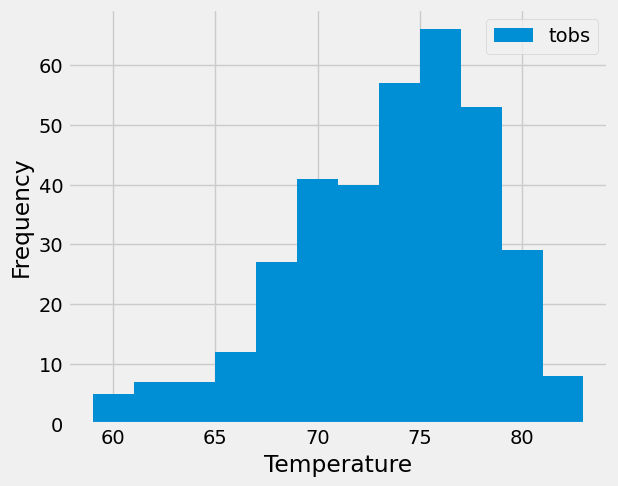

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [57]:
# Close Session
session.close()